<a href="https://colab.research.google.com/github/khairav/MachinLearning-Mini_Project/blob/main/NPL_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NPL FOR MULTI CLASS CATEGORIZATION
#Membuat Model NLP dengan TensorFlow
USE DATASET FROM KAGGLE News Headlines Dataset For Sarcasm Detection

In [3]:

# install kaggle package
!pip install -q kaggle
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"denidiana","key":"936b134a019e93123411ec2a6bff8ebb"}'}

In [7]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [8]:
# test kaggle dataset list
!kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              229KB  2021-06-18 20:55:49           7852  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4786  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1606  
dhruvildave/wikibooks-dataset                                 Wikibooks Dataset                                   1GB  2021-06-09 15:58:24           2260  
mathurinache/twitter-edge-nodes                               Tw

In [9]:
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection

news-headlines-dataset-for-sarcasm-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
!kaggle datasets download -bertcarremans/glovetwitter27b100dtxt

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: unrecognized arguments: -bertcarremans/glovetwitter27b100dtxt


In [10]:
# unzip
#!mkdir newsheadline
#!unzip news-headlines-dataset-for-sarcasm-detection.zip -d newsheadline
!ls newsheadline

Sarcasm_Headlines_Dataset.json	Sarcasm_Headlines_Dataset_v2.json


In [11]:
import pandas as pd
import json
headlines = pd.read_json("/content/newsheadline/Sarcasm_Headlines_Dataset_v2.json", lines=True)
headlines.head(10)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


In [12]:
headlines.tail(10)

,is_sarcastic,headline,article_link
28609,0,bakery owner vows to stop making wedding cakes...,https://www.huffingtonpost.com/entry/jack-phil...
28610,1,congressman picked last for committee on youth...,https://sports.theonion.com/congressman-picked...
28611,1,grandmother doesn't care for new priest,https://local.theonion.com/grandmother-doesn-t...
28612,1,polish rapper under fire for use of the word '...,https://entertainment.theonion.com/polish-rapp...
28613,0,how san antonio's dominant defense is fueling ...,https://www.huffingtonpost.com/entry/san-anton...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...
28618,1,dad clarifies this not a food stop,https://www.theonion.com/dad-clarifies-this-no...


# UNDERSTANDING DATA

In [13]:
headlines.shape

(28619, 3)

In [14]:
headlines.isnull().sum().sum()
#The dataset has 0 null values.

0

In [15]:
headlines.describe(include='object')

,headline,article_link
count,28619,28619
unique,28503,28617
top,"'no way to prevent this,' says only nation whe...",https://politics.theonion.com/nation-not-sure-...
freq,12,2


In [16]:
len(headlines[headlines.headline.duplicated()])

116

The dataset has 116 duplicated headlines. I wonder if these duplicated headlines are classified differently or not.

In [17]:
count_of_target = 0
for target in headlines.groupby(headlines.headline).is_sarcastic.agg(list):
    if(len(set(list(target))) != 1):
        count_of_target += 1
print(count_of_target)

0


It is important to consider this as if there are different labels for the same headline, it will confuse the model while training. Fortunately, although there are duplicate headlines in the dataset, they are not labelled differently

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go


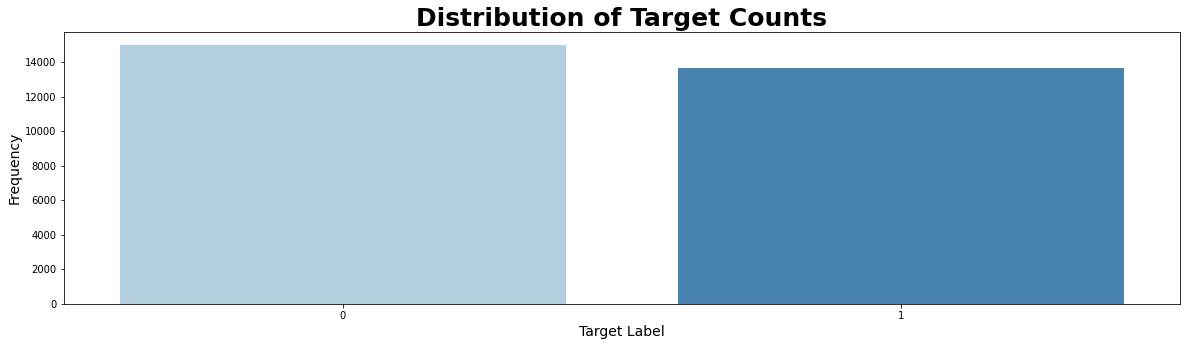

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(headlines.is_sarcastic, palette='Blues')
plt.title("Distribution of Target Counts", size=25, weight='bold')
plt.xlabel("Target Label", size=14)
plt.ylabel("Frequency", size=14)
plt.show()

there is an imbalance towards the positive class (sarcastic) in our dataset. This is important as it can have significant effect on the classifier although the imbalance is not severe hence we will not perform any oversampling and undersampling techniques to tweak this but it still worthy of note-taking.

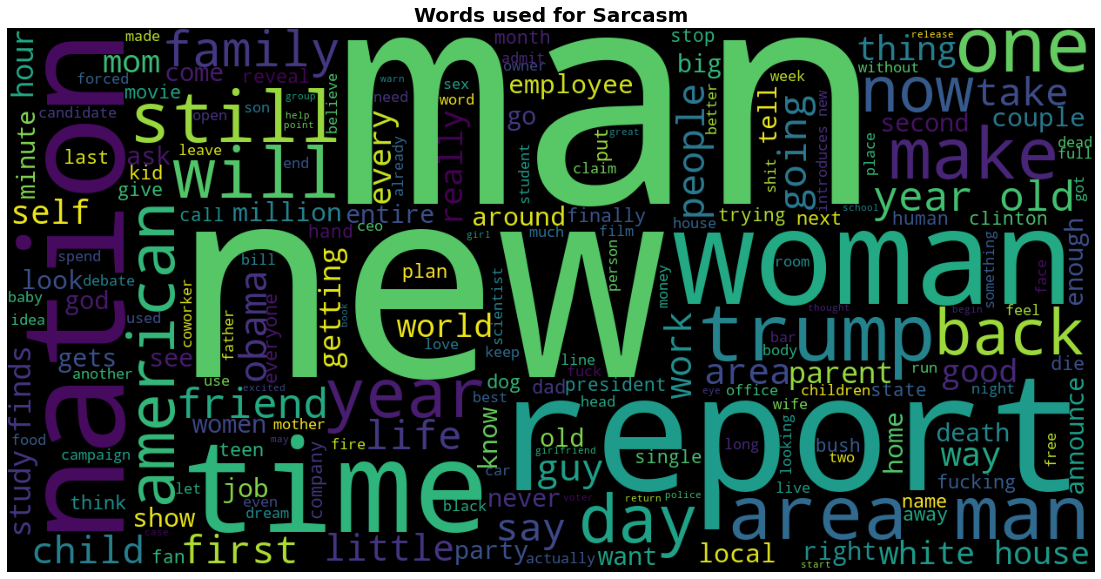

In [20]:
from wordcloud import WordCloud
all_keywords = " ".join(line for line in headlines[headlines.is_sarcastic==1].headline)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, 
                      random_state=42).generate(all_keywords)
plt.figure(figsize=(20, 10))
plt.title("Words used for Sarcasm", size=20, weight="bold")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

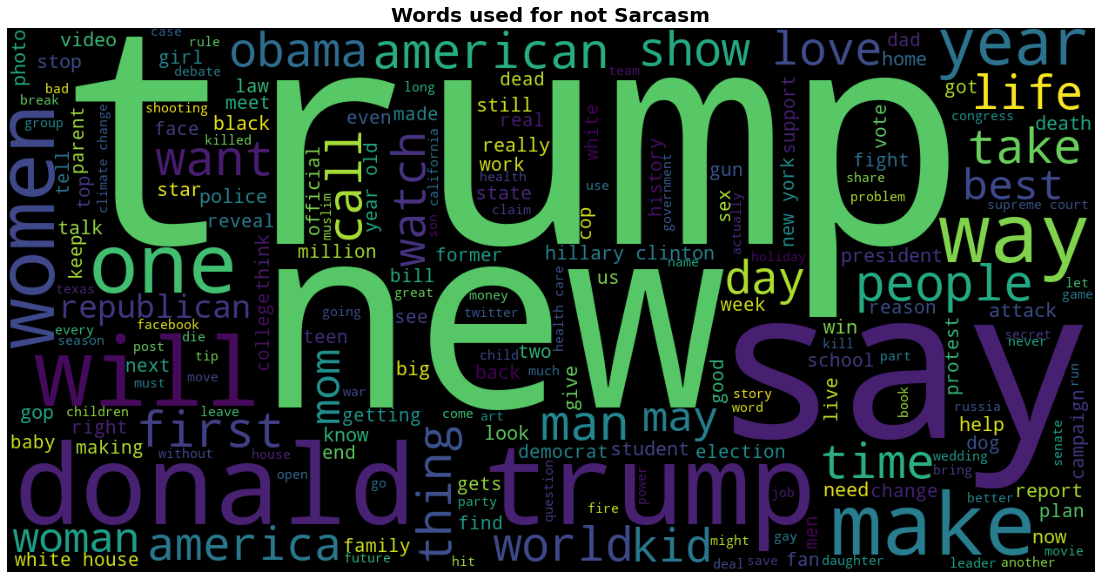

In [21]:
all_keywords = " ".join(line for line in headlines[headlines.is_sarcastic==0].headline)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, 
                      random_state=42).generate(all_keywords)
plt.figure(figsize=(20, 10))
plt.title("Words used for not Sarcasm", size=20, weight="bold")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

It can be derived from the wordcloud that for headlines with sarcasm consists of words like 'man', 'new' and 'report' are used often and for headlines with not sarcasm contains words like 'trump', 'say' and more.

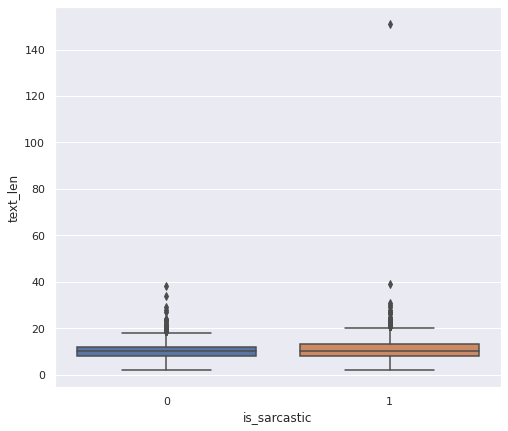

In [22]:
headlines['text_len'] = headlines['headline'].apply(lambda x: len(x.split(' ')))
sns.set(rc={'figure.figsize':(8 ,7)})
sns.boxplot(y='text_len', x="is_sarcastic", data=headlines)

In [48]:
headlines['headline'].head()

0    thirtysomething scientists unveil doomsday clo...
1    dem rep totally nails congress falling short g...
2          eat veggies 9 deliciously different recipes
3         inclement weather prevents liar getting work
4    mother comes pretty close using word streaming...
Name: headline, dtype: object

In [54]:
headlines['headline_length'] = headlines['headline'].apply(lambda x: len(x.split())) 

In [56]:
headlines['headline_length'].describe()

count    28619.000000
mean         7.293581
std          2.445716
min          1.000000
25%          6.000000
50%          7.000000
75%          9.000000
max        106.000000
Name: headline_length, dtype: float64

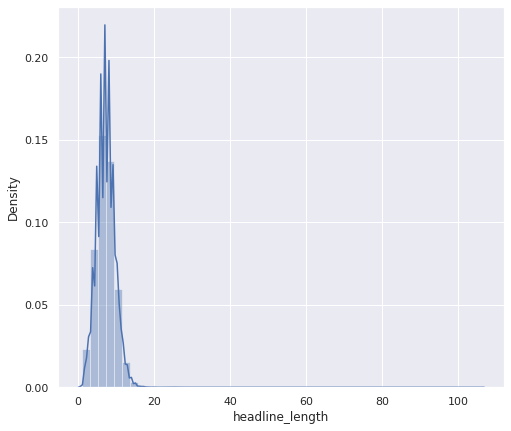

In [55]:
import seaborn as sns

sns.distplot(headlines['headline_length'])

# DATA CLEANING

In [23]:
import keras
import nltk
from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
import string
import re
warnings.filterwarnings('ignore')
sns.set()

def clean_headline(headline):
    STOPWORDS = set(stopwords.words("english"))
    headline = headline.lower()
    headline = " ".join(word for word in headline.split() if word not in STOPWORDS)
    headline = "".join(word for word in headline if word not in set(string.punctuation))
    return headline

headlines.headline = headlines.headline.apply(clean_headline)
headlines.drop('article_link', inplace=True, axis=1)
headlines.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,is_sarcastic,headline,text_len
0,1,thirtysomething scientists unveil doomsday clo...,8
1,0,dem rep totally nails congress falling short g...,13
2,0,eat veggies 9 deliciously different recipes,7
3,1,inclement weather prevents liar getting work,8
4,1,mother comes pretty close using word streaming...,9


In [24]:
nltk.download('punkt')
corpus = []
for text in headlines['headline']:
    words = [word.lower() for word in word_tokenize(text)] 
    corpus.append(words)
num_words = len(corpus)
print(num_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
28619


#PROCESSING

In [25]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SimpleRNN
from keras.initializers import Constant
import keras.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


In [26]:
X = headlines['headline'].values
y = headlines['is_sarcastic'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
max_len = 32
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len, truncating='post', padding='post')

X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_len, truncating='post', padding='post')

In [28]:
word_index = tokenizer.word_index
print("Number of unique words: {}".format(len(word_index)))

Number of unique words: 26615


In [ ]:
from google.colab import files
files.upload()

Task1: Make dictionary of all words in corpus in pre-trained glove embeddings

In [71]:
import warnings
import string
import re
warnings.filterwarnings('ignore')
sns.set()

embedding = {}
with open("/content/glove.twitter.27B.100d.txt") as file:
    for line in file:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding[word] = vectors
file.close()

In [72]:
embedding_matrix = np.zeros((num_words, 100))
for i, word in tokenizer.index_word.items():
    if i < (num_words+1):
        vector = embedding.get(word)
        if vector is not None:
            embedding_matrix[i] = vector

In [73]:
embedding_matrix.shape

(28619, 100)

In [74]:
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.44806999 -0.018342   -0.31766    ... -0.12541001  0.11663
  -0.05747   ]
 [-0.24645001  0.45247999  0.83719999 ... -0.98967999 -0.25141001
  -0.54979002]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


# MODEL LSTM

In [75]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(22895, 32) (22895,)
(5724, 32) (5724,)


In [76]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(input_dim=num_words, 
                         output_dim=100, 
                         embeddings_initializer=Constant(embedding_matrix), 
                         input_length=max_len, trainable=False))
LSTM_model.add(LSTM(50, dropout=0.1))
LSTM_model.add(Dense(1, activation='sigmoid'))

LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# New Section

In [77]:
LSTM_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 32, 100)           2861900   
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 2,892,151
Trainable params: 30,251
Non-trainable params: 2,861,900
_________________________________________________________________


In [78]:
# callback
import tensorflow as tf
from keras.callbacks import EarlyStopping
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.75 and logs.get('val_accuracy')>0.95):
      self.LSTM_model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 95%!")
callbacks = myCallback()

In [79]:

history = LSTM_model.fit(X_train, y_train, epochs=50, batch_size=1024, 
                    validation_data=(X_test, y_test),callbacks=[callbacks])

Epoch 1/50
23/23 [==============================] - 8s 237ms/step - loss: 0.6885 - accuracy: 0.5531 - val_loss: 0.6264 - val_accuracy: 0.6492
Epoch 2/50
23/23 [==============================] - 5s 212ms/step - loss: 0.6099 - accuracy: 0.6674 - val_loss: 0.5613 - val_accuracy: 0.7140
Epoch 3/50
23/23 [==============================] - 5s 207ms/step - loss: 0.5579 - accuracy: 0.7192 - val_loss: 0.5255 - val_accuracy: 0.7444
Epoch 4/50
23/23 [==============================] - 5s 210ms/step - loss: 0.5216 - accuracy: 0.7483 - val_loss: 0.5128 - val_accuracy: 0.7491
Epoch 5/50
23/23 [==============================] - 5s 209ms/step - loss: 0.5024 - accuracy: 0.7584 - val_loss: 0.4891 - val_accuracy: 0.7628
Epoch 6/50
23/23 [==============================] - 5s 212ms/step - loss: 0.4792 - accuracy: 0.7695 - val_loss: 0.4620 - val_accuracy: 0.7830
Epoch 7/50
23/23 [==============================] - 5s 212ms/step - loss: 0.4525 - accuracy: 0.7883 - val_loss: 0.4498 - val_accuracy: 0.7860
Epoch 

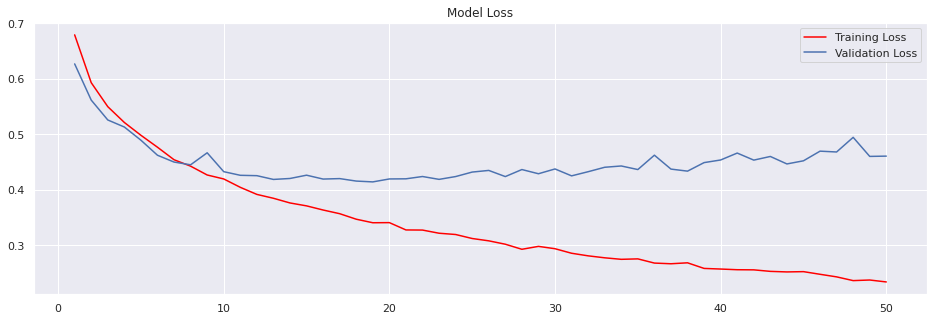

In [80]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.title("Model Loss")
plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')
plt.legend()
plt.show()

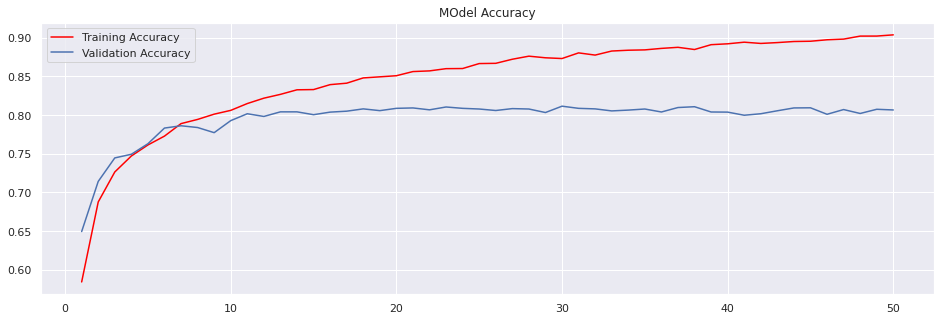

In [81]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.title("MOdel Accuracy")
plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy', color='red')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.legend()
plt.show()


In [82]:
print(classification_report(y_test, LSTM_model.predict_classes(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      2995
           1       0.81      0.78      0.79      2729

    accuracy                           0.81      5724
   macro avg       0.81      0.81      0.81      5724
weighted avg       0.81      0.81      0.81      5724

